In [1]:
!pip install missingno

In [3]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as missno
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [5]:
df=pd.read_csv('Titanic-Dataset.csv')
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [7]:
df.shape

(891, 12)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [11]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

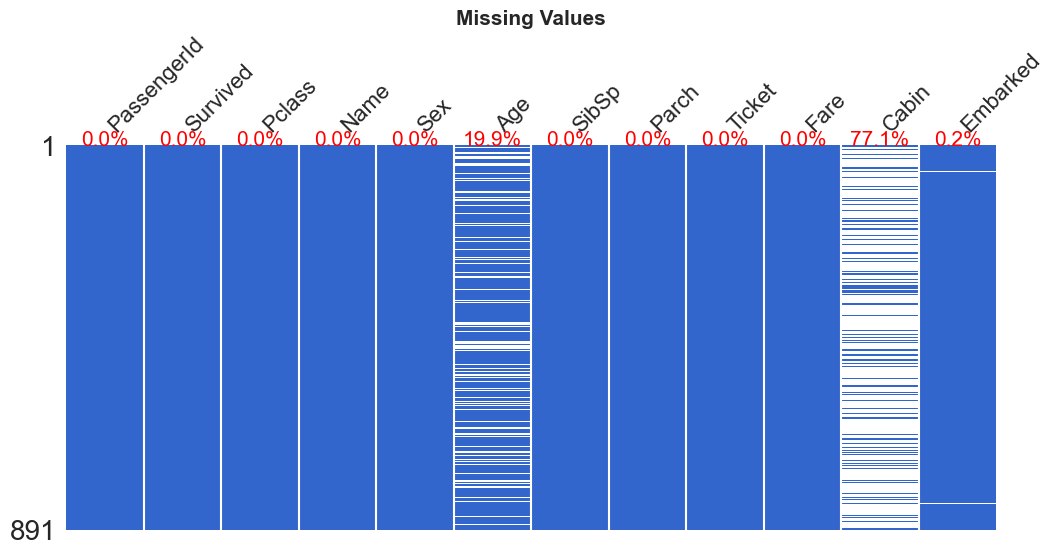

In [13]:
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(12, 5))
missno.matrix(df, sparkline=False, color=(0.2, 0.4, 0.8), ax=ax)
plt.title('Missing Values',fontsize=15,fontweight='bold')
missing_values=df.isnull().sum()/len(df)*100
for i, col in enumerate(df.columns):
    ax.text(i,-0.5,f'{missing_values[col]:.1f}%',ha='center',fontsize=15,color='red')
plt.show()

The analysis shows that the Cabin, Age, and Embarked columns have missing values

With percentages of 77.1%, 19.1%, and 0.2%, respectively

In [38]:
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df.drop(columns=['Cabin'],inplace=True)

In [40]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

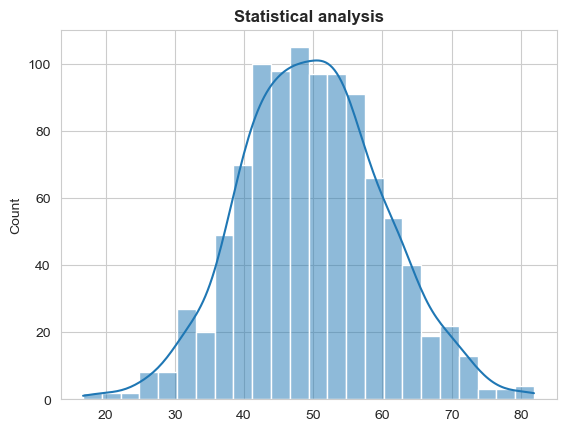

Mean: 49.951158760175865
Median: 49.73871430106739
Standard Deviation: 10.207548044346435
Skewness: 0.10276114594765139
Kurtosis: 0.05991020244296319
Shapiro-Wilk Test: ShapiroResult(statistic=0.9981532851790867, pvalue=0.35287449889298195)


In [42]:

cleaned_data = np.random.normal(loc=50, scale=10, size=1000)
sns.histplot(cleaned_data, kde=True)
plt.title('Statistical analysis',fontweight='bold')
plt.show()

print("Mean:", np.mean(cleaned_data))
print("Median:", np.median(cleaned_data))
print("Standard Deviation:", np.std(cleaned_data))
print("Skewness:", stats.skew(cleaned_data))  
print("Kurtosis:", stats.kurtosis(cleaned_data))
shapiro_test = stats.shapiro(cleaned_data)
print("Shapiro-Wilk Test:", shapiro_test)


This shows that normally distributed

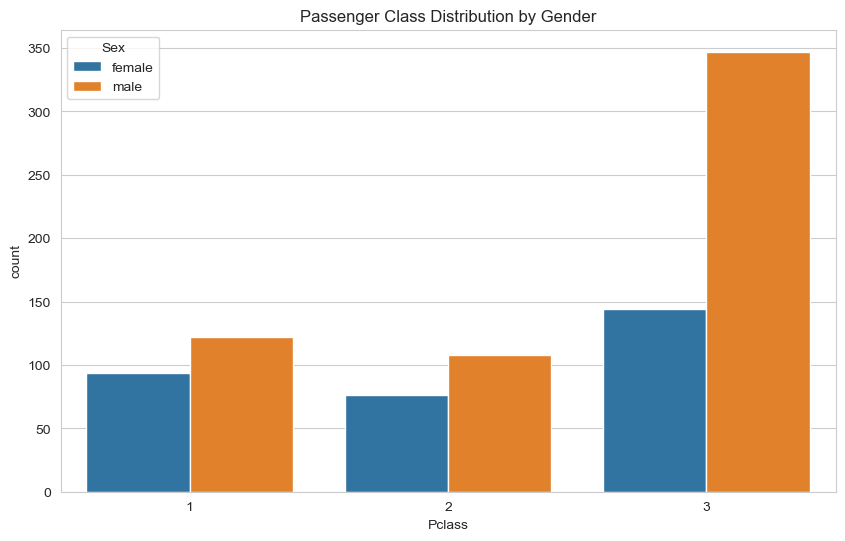

In [47]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df,x='Pclass',hue='Sex' )
plt.title("Passenger Class Distribution by Gender")
plt.show()


In all passenger classes, the number of male passengers is higher than the number of female passenger

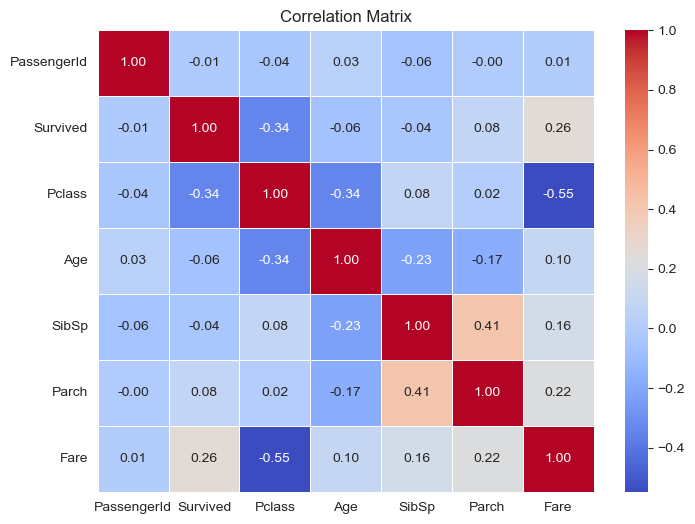

In [50]:
corr_matrix = df.corr(numeric_only=True)  
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()


Passengers who paid higher fares, higher chance of survival.

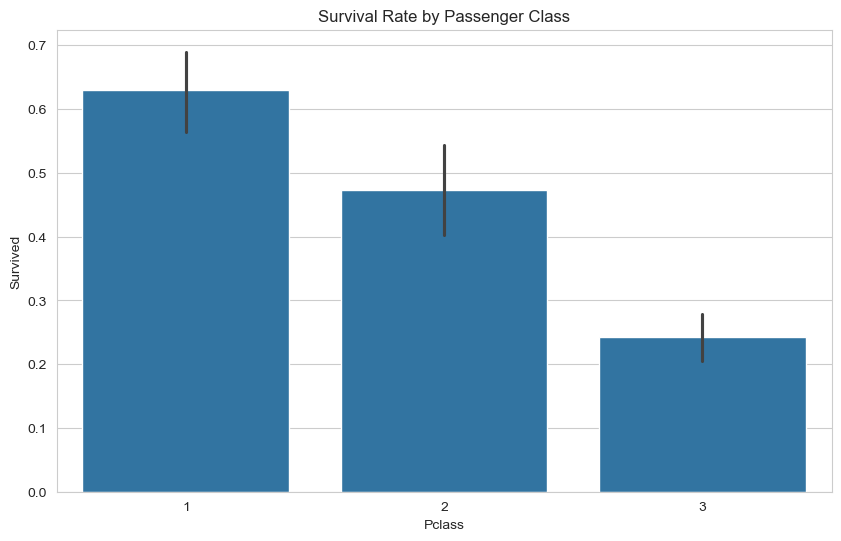

In [53]:
plt.figure(figsize=(10, 6))
sns.barplot( data=df,x='Pclass',y='Survived')
plt.title("Survival Rate by Passenger Class")
plt.show()

This Graph shows that highly Survival Rate by Passenger Class 1

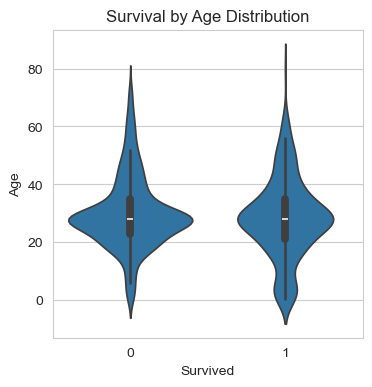

In [56]:
plt.figure(figsize=(4,4))
sns.violinplot(x='Survived', y='Age', data=df)
plt.title("Survival by Age Distribution")
plt.show()

Young children (near 0–10 years)  had better survival chances

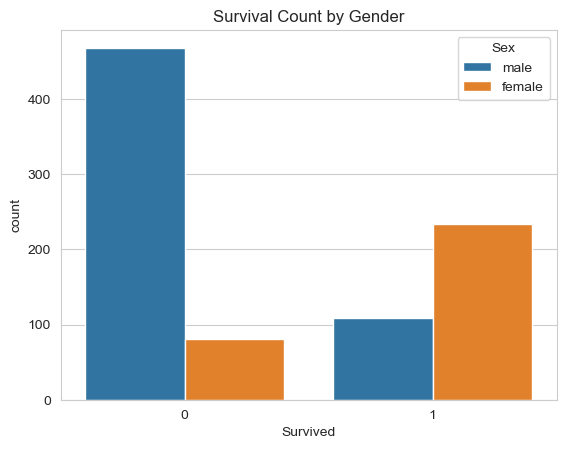

In [59]:
sns.countplot(x='Survived', hue='Sex', data=df)
plt.title("Survival Count by Gender")
plt.show()


Survial By Females are higher chances than Males

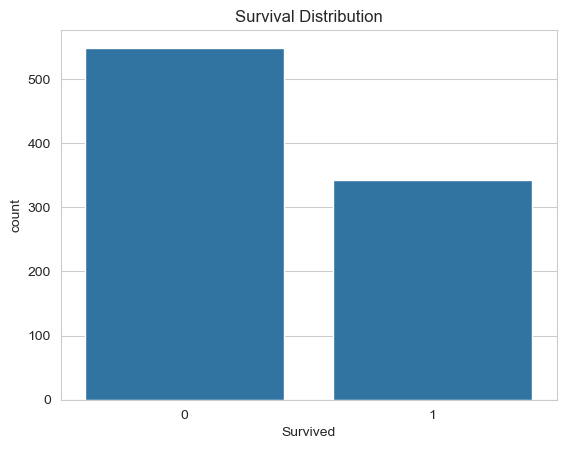

In [62]:
sns.countplot(x='Survived', data=df)
plt.title("Survival Distribution")
plt.show()


The number of deaths is much higher than the number of survivors

                                Complete Conclusion
Gender Distribution: In all passenger classes (Pclass), more male passengers were on board than females.

Fare and Survival: Those who paid more for their tickets were more likely to survive.

Passenger Class Impact: First-class passengers (Pclass 1) had the highest survival rate.

Age and Survival: Young children (0–10 years old) had a better chance of survival

Gender and Survival: Females had a higher survival rate than males.

Overall Survival Rate: The number of deaths was significantly higher than the number of survivors. 